# Question 2  
  
(10 marks) Table 15.13 contains air pollution data from 41 US cities. There are 7 variables, $y_1,...,y_7$.

In [1]:
library(MASS)

data <- read.table(file = "/Users/alexwiigs/Documents/Code/STAT 553 Assigmnents/Assignment 5/T15_13_POLLUTION.dat")
colnames(data) <- c("City", "SO2 content", "Temperature", "Manfacturing Enterprises", "Population Size", "Wind Speed", "Precipitation", "Days of Precipitation")
Y <- as.matrix(data[,-1])
head(data)

,City,SO2 content,Temperature,Manfacturing Enterprises,Population Size,Wind Speed,Precipitation,Days of Precipitation
,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
1,Phoenix,10,70.3,213,582,6.0,7.05,36
2,LittleRock,13,61.0,91,132,8.2,48.52,100
3,San.Fran,12,56.7,453,716,8.7,20.66,67
4,Denver,17,51.9,454,515,9.0,12.95,86
5,Hartford,56,49.1,412,158,9.0,43.37,127
6,Wilmington,36,54.0,80,80,9.0,40.25,114


 a) Carry out a cluster analysis using the average linkage method. Present the dendrogram and a three-cluster solution.

Set up the average link method like so:

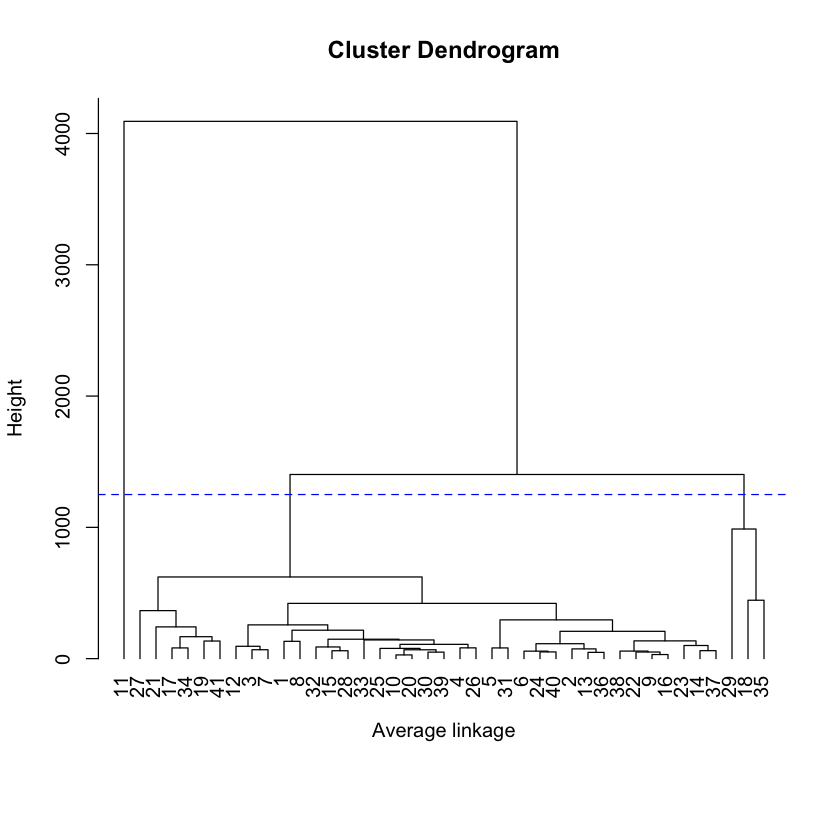

In [2]:
cluster <- hclust(dist(Y, method = "euclidean"), method = "average")
par(mfrow = c(1,1))
plot(cluster, cex = 1, sub = "", hang = -0.1, xlab = "")
title(xlab = "Average linkage", line = 0)
abline(h = 1250, col = "blue", lty = 2)

In [3]:
fit <- cutree(cluster, k = 3)
table(fit)
data[c(11,29,18,35),]

fit
 1  2  3 
37  1  3 

,City,SO2 content,Temperature,Manfacturing Enterprises,Population Size,Wind Speed,Precipitation,Days of Precipitation
,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
11,Chicago,110,50.6,3344,3369,10.4,34.44,122
29,Philadelphia,69,54.6,1692,1950,9.6,39.93,115
18,Detroit,35,49.9,1064,1513,10.1,30.96,129
35,Houston,10,68.9,721,1233,10.8,48.19,103


We have created 3 clusters in the data. Chicago is all by itself in a cluster. Philadelphia, Detroit, Houston, all make a second cluster. All the other cities are in the remaining cluster.

b) Find the first two discriminant functions using the three clusters as groups. Use the two discriminant functions to view the three clusters.

Running an LDA yields the following:

In [4]:
model <- lda(Y, fit)
model

Call:
lda(Y, grouping = fit)

Prior probabilities of groups:
         1          2          3 
0.90243902 0.02439024 0.07317073 

Group means:
  SO2 content Temperature Manfacturing Enterprises Population Size Wind Speed
1    27.24324    55.73784                 328.8108        456.4324   9.359459
2   110.00000    50.60000                3344.0000       3369.0000  10.400000
3    38.00000    57.80000                1159.0000       1565.3333  10.166667
  Precipitation Days of Precipitation
1      36.59486              113.5405
2      34.44000              122.0000
3      39.69333              115.6667

Coefficients of linear discriminants:
                                  LD1          LD2
SO2 content               0.007068991  0.012750844
Temperature               0.003614052  0.016789109
Manfacturing Enterprises  0.001494066 -0.007572005
Population Size           0.002816666  0.006866663
Wind Speed               -0.049940981  0.216713262
Precipitation             0.012068539 -0.0054677

Which gives the first two discriminant functions as:

In [5]:
A <- cbind( model$scaling[,1], model$scaling[,2])
colnames(A) <- c("a1", "a2")
t(A)

,SO2 content,Temperature,Manfacturing Enterprises,Population Size,Wind Speed,Precipitation,Days of Precipitation
a1,0.007068991,0.003614052,0.001494066,0.002816666,-0.04994098,0.012068539,-0.00544139
a2,0.012750844,0.016789109,-0.007572005,0.006866663,0.21671326,-0.005467783,0.01142134


In [6]:
Y_bar <- matrix(ncol = 7, nrow = 41)
for (i in 1:7) { Y_bar[,i] = mean(Y[,i]) }
Z = unname(t(A) %*% t(Y - Y_bar))
rownames(Z) <- c("z1", "z2")
Z

z1,-0.3005775,-1.720394,0.261147533,-0.4969279,-1.155629,-1.9619458,0.4212086,-0.5463504,-1.00028072,-0.3276285,...,-0.05624058,-0.64467353,0.93037352,2.179208,-1.825440,-1.349356,-1.1345303,-0.6145333,-2.1396574,0.06775876
z2,0.2258445,-1.077269,-0.009363201,-1.0897917,-2.470947,-0.7968096,1.1757653,1.7252824,0.07499223,-0.1523824,...,0.68088540,-0.09799045,0.08613284,2.406468,-0.935004,1.018227,-0.5474168,0.5638168,-0.7176679,0.25089639


We can use these to view the three clusters like so:

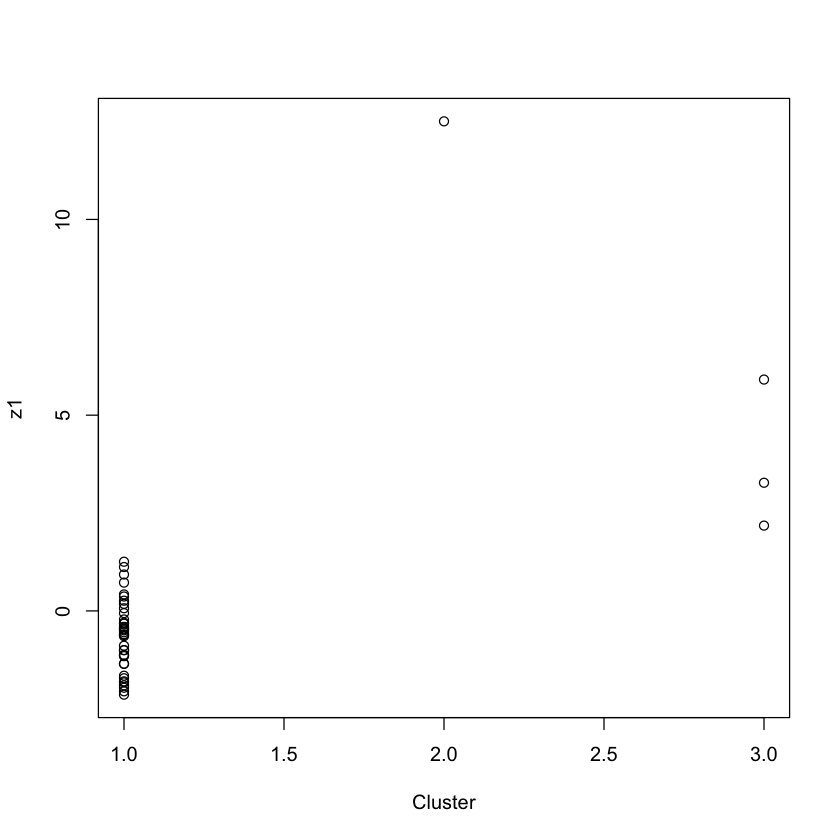

In [7]:
plot(as.integer(fit), Z[1,], xlab = "Cluster", ylab = "z1")

$z_1$ seperates the clusters very neatly.

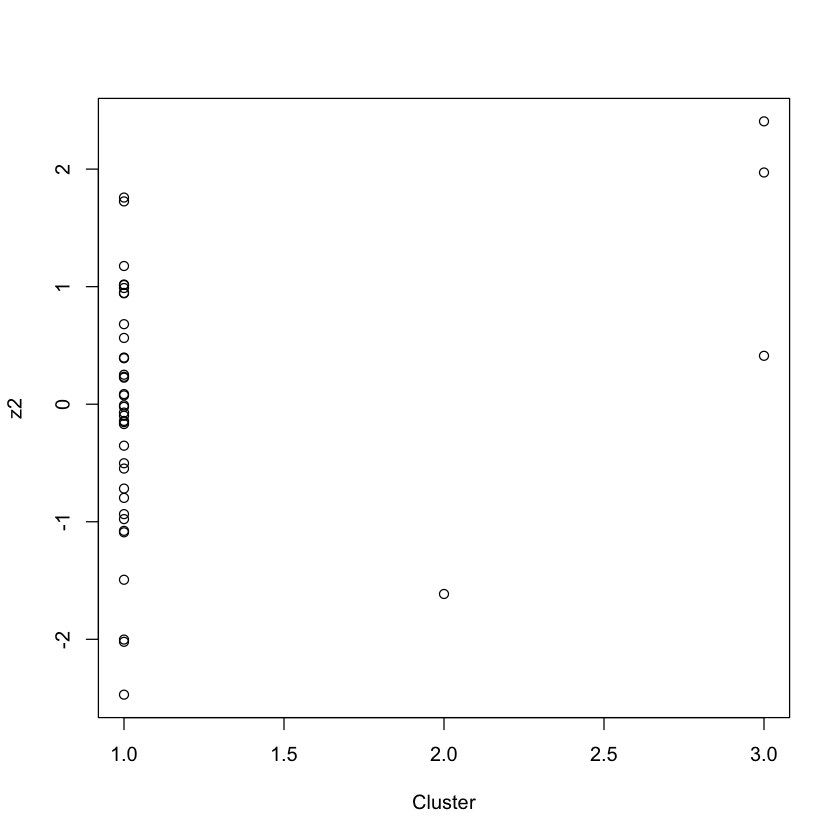

In [8]:
plot(as.integer(fit), Z[2,],xlab = "Cluster", ylab = "z2")

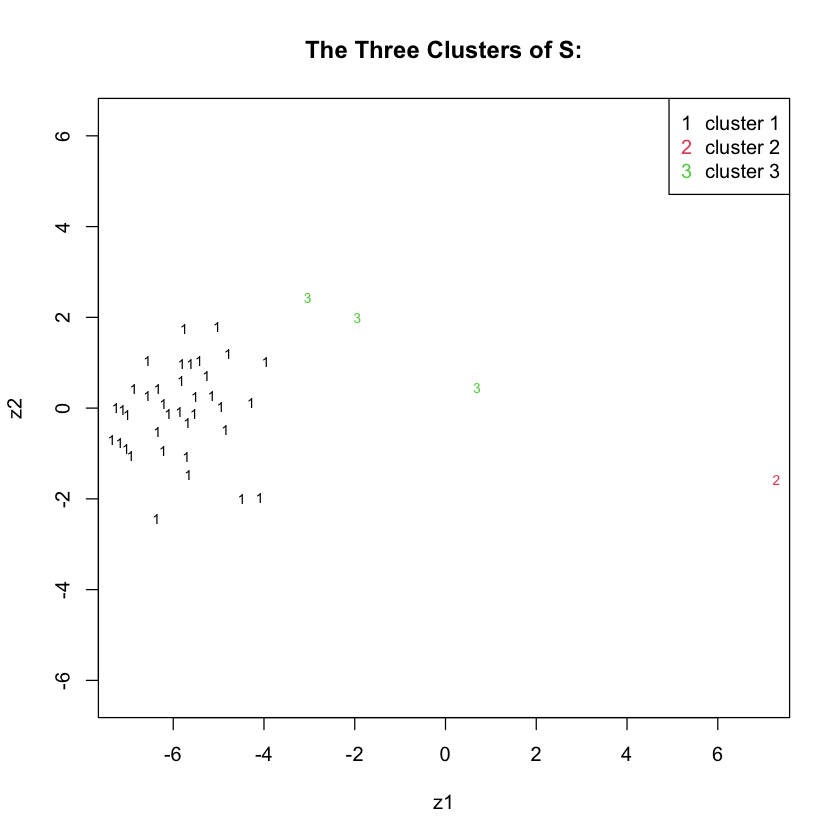

In [9]:
plot(model, col = as.integer(fit), xlab = "z1", ylab = "z2", main = "The Three Clusters of S:" )
legend("topright", legend = paste("cluster", 1:3), , pch = as.character(1:3), col = 1:3)

c) Use PCA based on correlation matrix $\textbf{R}$ to view the three clusters.

In [10]:
R <- cor(Y)
round(R,2)

,SO2 content,Temperature,Manfacturing Enterprises,Population Size,Wind Speed,Precipitation,Days of Precipitation
SO2 content,1.00,-0.43,0.64,0.49,0.09,0.05,0.37
Temperature,-0.43,1.00,-0.19,-0.06,-0.35,0.39,-0.43
Manfacturing Enterprises,0.64,-0.19,1.00,0.96,0.24,-0.03,0.13
Population Size,0.49,-0.06,0.96,1.00,0.21,-0.03,0.04
Wind Speed,0.09,-0.35,0.24,0.21,1.00,-0.01,0.16
Precipitation,0.05,0.39,-0.03,-0.03,-0.01,1.00,0.50
Days of Precipitation,0.37,-0.43,0.13,0.04,0.16,0.50,1.00


Repeating the steps above with $R$, we get...

In [11]:
A_2 <- eigen(R)$vectors[,1:2]
colnames(A_2) <- c("a1", "a2")
t(A_2)

a1,0.48969882,-0.31537069,0.5411687,0.4875881,0.24987493,0.0001873122,0.2601791
a2,-0.08457563,0.08863789,0.2258811,0.2820038,-0.05547149,-0.6258793663,-0.6779674


Which allows us to view the three clusters.

z1,-2.68265,-1.6966680,-0.9274435,-0.5431145,0.4547229,-0.6885227,-0.04555952,-1.3591296,-1.694675,-0.6109983,...,-0.9109406,-0.9457782,-0.6232184,-0.08771464,-0.8872162,-0.5172144,-1.0012137,0.5195842,-0.9995106,0.8402408
z2,3.84369,-0.4765005,2.2097945,1.9477464,-1.0838698,-0.6243922,0.05027326,-0.9268824,-1.489491,-0.6302598,...,-0.3176881,-0.6268374,1.2956096,0.25974239,1.4217997,-0.7727563,-0.4838457,-1.5120340,-1.4132303,0.1076145


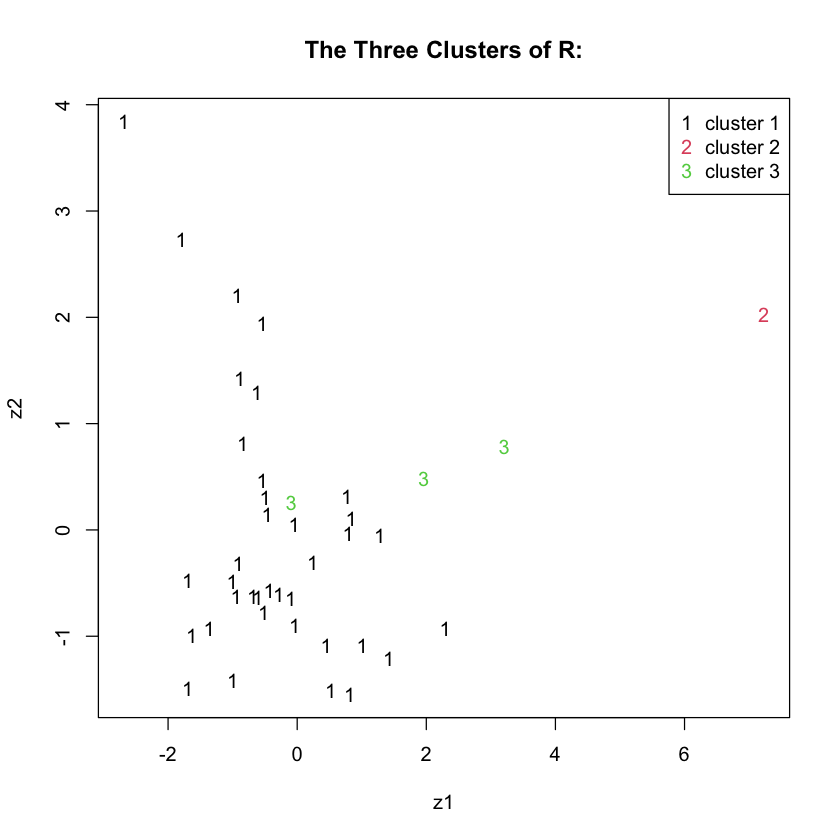

In [12]:
Z_2 <- t(A_2) %*% t(scale(Y))
rownames(Z_2) <- c("z1", "z2")
Z_2
plot(Z_2[1,], Z_2[2,], pch = as.character(fit), col = fit, xlab = "z1", ylab = "z2", main = "The Three Clusters of R:")
legend("topright", legend = paste("cluster", 1:3), , pch = as.character(1:3), col = 1:3)